In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler   # u otros scalers
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
### carga datos de dataset en dataframe
file_path= 'uber_fares.csv'

df = pd.read_csv(file_path)

In [4]:
### visualizacion de algunos datos
df.head()

,key,date,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


#### Contexto  
El proyecto trata sobre **Uber Inc.**, la compañía de taxis más grande del mundo. En este trabajo, nuestro objetivo es **predecir la tarifa de futuros viajes**.  

Uber brinda servicio a millones de clientes cada día, por lo que gestionar adecuadamente sus datos es clave para desarrollar nuevas estrategias de negocio y obtener mejores resultados.  

### Variables del conjunto de datos  

**Variables explicativas:**  
- **key**: identificador único de cada viaje.  
- **pickup_datetime**: fecha y hora en que se inició el viaje.  
- **passenger_count**: cantidad de pasajeros en el vehículo (dato ingresado por el conductor).  
- **pickup_longitude**: longitud del punto de inicio del viaje.  
- **pickup_latitude**: latitud del punto de inicio del viaje.  
- **dropoff_longitude**: longitud del punto de destino.  
- **dropoff_latitude**: latitud del punto de destino.  

**Variable objetivo (target):**  
- **fare_amount**: costo del viaje en dólares.  

In [5]:
### Columnas, ¿cuáles son variables numéricas y cuales variables categóricas?
df.columns

Index(['key', 'date', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                200000 non-null  int64  
 1   date               200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


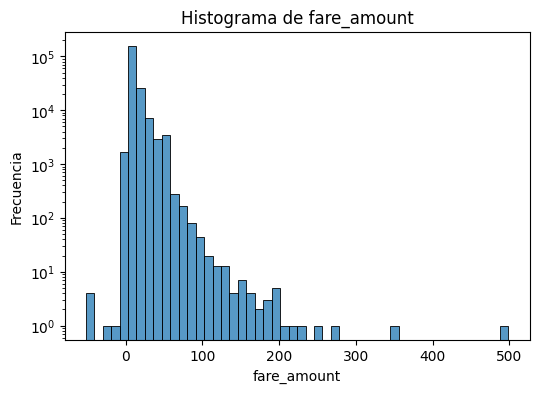

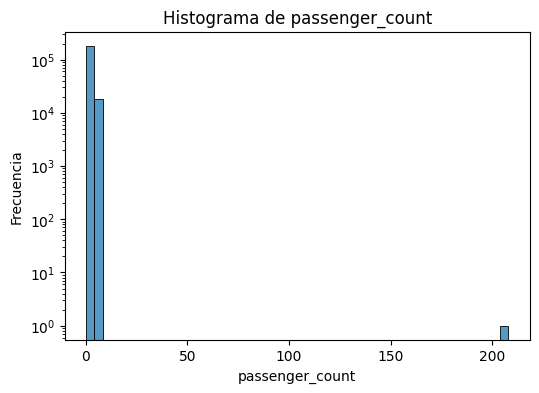

In [21]:
numericas = ["fare_amount", "passenger_count"]

for col in numericas:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=50, kde=False)
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    scale = 'log' if col in ['fare_amount', 'passenger_count'] else 'linear'
    plt.yscale(scale)
    plt.show()
    

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='fare_amount'), df['fare_amount'], test_size=0.2, random_state=42)
X_train.head()

,key,date,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
153248,17778666,2009-11-19 21:59:00.00000086,2009-11-19 21:59:00 UTC,-73.978585,40.748388,-73.976913,40.784958,1
67802,54334677,2013-02-27 22:29:15.0000004,2013-02-27 22:29:15 UTC,-73.978198,40.752533,-73.909752,40.874372,1
148889,11815656,2014-06-01 08:48:00.00000094,2014-06-01 08:48:00 UTC,-73.994242,40.751227,-73.999432,40.762037,1
103093,28734805,2010-07-10 23:10:00.00000019,2010-07-10 23:10:00 UTC,-73.951705,40.778330,-73.956050,40.777560,2
104681,54482655,2013-09-29 13:36:00.000000167,2013-09-29 13:36:00 UTC,-73.989120,40.736932,-73.782890,40.643947,1


In [8]:
X_train.describe()

,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.600000e+05,160000.000000,160000.000000,159999.000000,159999.000000,160000.000000
mean,2.771233e+07,-72.525896,39.936265,-72.525260,39.919258,1.684988
std,1.603218e+07,11.557753,8.090121,13.611271,6.880320,1.405686
min,1.000000e+00,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.379326e+07,-73.992062,40.734842,-73.991433,40.733835,1.000000
50%,2.775608e+07,-73.981834,40.752594,-73.980080,40.753044,1.000000
75%,4.155845e+07,-73.967212,40.767116,-73.963614,40.768055,2.000000
max,5.542357e+07,57.418457,1644.421482,1153.572603,872.697628,208.000000
